In [2]:
import pandas as pd
# Load and examine parquet files
X = pd.read_parquet('mobile_banking_features.parquet')
y = pd.read_parquet('mobile_banking_target.parquet')

print("Feature matrix shape:", X.shape)
print("\nTarget vector shape:", y.shape)
print("\nFeatures included:")
print(X.columns.tolist())
print("\nFirst few rows of features:")
print(X.head())
print("\nFirst few target values:")
print(y.head())

Feature matrix shape: (28, 12)

Target vector shape: (28, 1)

Features included:
['Adult populaiton', 'Total Account Holders', 'Financial Institution Account Holders', 'Digital Users from Lower Income', 'Digital Balance Check Users', 'Avg Price of 1GB (USD)', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Bank capital to assets ratio (%)', 'Commercial bank branches (per 100,000 adults)', 'Individuals using the Internet (% of population)', 'Mobile cellular subscriptions (per 100 people)', 'Personal remittances, received (% of GDP)']

First few rows of features:
                   Adult populaiton  Total Account Holders  \
Country name Year                                            
Cambodia     2011         9542433.0               349226.0   
             2014        10201258.0              2261136.0   
             2017        10817360.0              2344315.0   
             2021        11548637.0              3856666.0   
Indonesia    2011       172118016.0             33

In [3]:
print("Summary statistics:")
print(X.describe())

# Check missing values
print("\nMissing values count:")
print(X.isnull().sum())

# Check unique countries
print("\nUnique countries:")
print(X.index.get_level_values('Country name').unique())

Summary statistics:
       Adult populaiton  Total Account Holders  \
count      2.800000e+01           2.800000e+01   
mean       6.005499e+07           2.795845e+07   
std        5.876267e+07           2.659368e+07   
min        4.366302e+06           3.492260e+05   
25%        1.136582e+07           4.852269e+06   
50%        5.617219e+07           2.117435e+07   
75%        7.094660e+07           4.011218e+07   
max        2.025825e+08           1.048472e+08   

       Financial Institution Account Holders  Digital Users from Lower Income  \
count                           2.800000e+01                     7.000000e+00   
mean                            2.740959e+07                     3.231887e+06   
std                             2.622859e+07                     2.614826e+06   
min                             3.492260e+05                     5.103960e+05   
25%                             4.837331e+06                     9.609310e+05   
50%                             2.061033e+0

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Drop rows where target is NaN
combined = X.join(y)
combined = combined.dropna(subset=['target'])

# Split features and target
X_clean = combined.drop('target', axis=1)
y_clean = combined['target']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_clean), columns=X_clean.columns, index=X_clean.index)

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns, index=X_imputed.index)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'R2': r2, 'RMSE': rmse}
    
# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"R2 Score: {metrics['R2']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}\n")

Linear Regression:
R2 Score: 0.4243
RMSE: 10036279.2373

Ridge:
R2 Score: 0.5509
RMSE: 8863836.2708

Lasso:
R2 Score: 0.1876
RMSE: 11922510.1824

Random Forest:
R2 Score: 0.3792
RMSE: 10422255.0091



C:\Users\Katarina\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+12, tolerance: 5.312e+10
  model = cd_fast.enet_coordinate_descent(


In [6]:
# Try Ridge with different alphas
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

# Ridge with cross-validation
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)

print(f"Best alpha: {ridge_cv.alpha_}")
print(f"Best score: {ridge_cv.score(X_test, y_test)}")

# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression

# Select top features
selector = SelectKBest(f_regression, k=5)
X_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()].tolist()
print("\nTop 5 most important features:", selected_features)

Best alpha: 1.0
Best score: 0.5509494431582511

Top 5 most important features: ['Adult populaiton', 'Total Account Holders', 'Financial Institution Account Holders', 'Digital Balance Check Users', 'Avg Price of 1GB (USD)']


In [19]:
# First, verify our data
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Retrain with original configuration that gave us 0.55
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)

# Make predictions
y_pred = ridge_cv.predict(X_test)

print(f"\nR2 Score with full feature set: {r2_score(y_test, y_pred):.4f}")
print(f"Best alpha selected: {ridge_cv.alpha_}")

Training set shape: (16, 12)
Test set shape: (5, 12)

R2 Score with full feature set: 0.5509
Best alpha selected: 1.0


In [21]:
# Get feature importance scores
importance = np.abs(ridge_cv.coef_).ravel()  # Flatten the coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance Rankings:")
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


Feature Importance Rankings:
Individuals using the Internet (% of population): 4482475.4317
Personal remittances, received (% of GDP): 3155105.0208
Total Account Holders: 2287072.2168
Digital Balance Check Users: 1907279.7631
Financial Institution Account Holders: 1744929.9381
Mobile cellular subscriptions (per 100 people): 748901.1678
Adult populaiton: 662960.7436
Digital Users from Lower Income: 571804.4072
Commercial bank branches (per 100,000 adults): 417070.0271
Avg Price of 1GB (USD): 392100.9888
Bank capital to assets ratio (%): 243925.0191
Automated teller machines (ATMs) (per 100,000 adults): 243217.8534


In [23]:
from sklearn.preprocessing import PolynomialFeatures

# Select our top 3 features
top_features = ['Individuals using the Internet (% of population)', 
                'Personal remittances, received (% of GDP)',
                'Total Account Holders']

# Create polynomial features (degree=2) for just these top predictors
poly = PolynomialFeatures(degree=2, include_bias=False)
X_top = X_train[top_features]
X_top_poly = poly.fit_transform(X_top)
X_test_top = X_test[top_features]
X_test_poly = poly.transform(X_test_top)

# Train model with polynomial features
ridge_poly = RidgeCV(alphas=alphas)
ridge_poly.fit(X_top_poly, y_train)
y_pred = ridge_poly.predict(X_test_poly)

print(f"Polynomial Features R2 Score: {r2_score(y_test, y_pred):.4f}")

Polynomial Features R2 Score: 0.5567


In [26]:
# Use our winning combination of features and parameters
top_features = ['Individuals using the Internet (% of population)', 
                'Personal remittances, received (% of GDP)',
                'Total Account Holders']

# Keep degree=2 polynomials which gave us our best score
poly = PolynomialFeatures(degree=2, include_bias=False)
X_top = X_train[top_features]
X_top_poly = poly.fit_transform(X_top)
X_test_top = X_test[top_features]
X_test_poly = poly.transform(X_test_top)

# Use original alpha range that produced our best results
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_poly = RidgeCV(alphas=alphas)
ridge_poly.fit(X_top_poly, y_train)
y_pred = ridge_poly.predict(X_test_poly)

print(f"Best Model R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Best alpha selected: {ridge_poly.alpha_}")

Best Model R2 Score: 0.5567
Best alpha selected: 0.1


In [30]:
top_features = ['Individuals using the Internet (% of population)', 
                'Personal remittances, received (% of GDP)',
                'Total Account Holders']

# Keep the successful polynomial degree=2 setup
poly = PolynomialFeatures(degree=2, include_bias=False)
X_top = X_train[top_features]
X_top_poly = poly.fit_transform(X_top)
X_test_top = X_test[top_features]
X_test_poly = poly.transform(X_test_top)

# Use the optimal alpha that gave us our best performance
ridge_poly = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_poly.fit(X_top_poly, y_train)
y_pred = ridge_poly.predict(X_test_poly)

print(f"Champion Model R2 Score: {r2_score(y_test, y_pred):.4f}")

Champion Model R2 Score: 0.5567


In [33]:
# Create exponential and interaction features
top_features = ['Individuals using the Internet (% of population)', 
                'Personal remittances, received (% of GDP)',
                'Total Account Holders']

X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Add exponential terms
for feature in top_features:
    X_enhanced[f'{feature}_exp'] = X_train[feature] ** 2
    X_test_enhanced[f'{feature}_exp'] = X_test[feature] ** 2

# Add targeted interactions between Internet and other features
X_enhanced['Internet_Remittance'] = X_train[top_features[0]] * X_train[top_features[1]]
X_enhanced['Internet_Accounts'] = X_train[top_features[0]] * X_train[top_features[2]]
X_test_enhanced['Internet_Remittance'] = X_test[top_features[0]] * X_test[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test[top_features[0]] * X_test[top_features[2]]

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Power Model R2 Score: {r2_score(y_test, y_pred):.4f}")

Power Model R2 Score: 0.5889


In [35]:
# Handle NaN values first
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Fill NaN values with median
for feature in top_features:
    X_enhanced[feature] = X_enhanced[feature].fillna(X_enhanced[feature].median())
    X_test_enhanced[feature] = X_test_enhanced[feature].fillna(X_enhanced[feature].median())

# Create power transformations
for feature in top_features:
    X_enhanced[f'{feature}_squared'] = X_enhanced[feature] ** 2
    X_test_enhanced[f'{feature}_squared'] = X_test_enhanced[feature] ** 2

# Add targeted interactions
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Clean Power Model R2 Score: {r2_score(y_test, y_pred):.4f}")

Clean Power Model R2 Score: 0.5889


In [42]:
# Create targeted polynomial and interaction features
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Main polynomial terms
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2

# Cross-terms between top features
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.01, 0.1, 1.0])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Enhanced Polynomial R2 Score: {r2_score(y_test, y_pred):.4f}")

Enhanced Polynomial R2 Score: 0.6193


In [43]:
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our successful transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]

# Add the same transformations to test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

# Fine-tune our model
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Optimal Polynomial R2 Score: {r2_score(y_test, y_pred):.4f}")

Optimal Polynomial R2 Score: 0.6193


In [44]:
# Build on our winning formula
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep proven successful transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]

# Add weighted interaction term
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.001, 0.01, 0.1])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Refined Polynomial R2 Score: {r2_score(y_test, y_pred):.4f}")

Refined Polynomial R2 Score: 0.6225


In [45]:
# Build on our winning formula with 0.6225 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep proven successful transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2

# Add normalized interaction term
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())

# Mirror all transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.001, 0.01, 0.1])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Advanced Polynomial R2 Score: {r2_score(y_test, y_pred):.4f}")

Advanced Polynomial R2 Score: 0.6232


In [47]:
# Build on our winning formula with 0.6232 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep all our successful transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Elite Polynomial R2 Score: {r2_score(y_test, y_pred):.4f}")

Elite Polynomial R2 Score: 0.6322


In [48]:
# Build on our winning formula with 0.6322 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our champion transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())

# Add sophisticated scaling term
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])

# Mirror all transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Master Polynomial R2 Score: {r2_score(y_test, y_pred):.4f}")

Master Polynomial R2 Score: 0.6651


In [49]:
# Build on formula with 0.6651 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])

# Add advanced geometric mean interaction
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])

# Mirror all transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.00001, 0.0001, 0.001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial R2 Score: 0.7754


In [51]:
# Build on our champion formula with 0.7754 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Harmonic_Internet'] = 2 / (1/X_enhanced['Scaled_Internet'] + 1/X_enhanced['Weighted_Internet'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Harmonic_Internet'] = 2 / (1/X_test_enhanced['Scaled_Internet'] + 1/X_test_enhanced['Weighted_Internet'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.000001, 0.00001, 0.0001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)

print(f"Supreme Polynomial R2 Score: {r2_score(y_test, y_pred):.4f}")

Supreme Polynomial R2 Score: 0.7647


In [53]:
# Build on formula with 0.7754 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.000001, 0.00001, 0.0001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V2 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V2 R2 Score: 0.7745


In [55]:
# Build on our proven formula with consistent 0.77+ R² scores
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.000001, 0.00001, 0.0001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V3 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V3 R2 Score: 0.7774


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
# Build on our champion formula with 0.7774 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.000001, 0.00001, 0.0001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V3 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V3 R2 Score: 0.7774


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [58]:
# Build on our champion formula with 0.7774 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.000001, 0.00001, 0.0001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V5 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V5 R2 Score: 0.8924


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
# Build on formula with 0.8924 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']
X_enhanced['Enhanced_Effect'] = X_enhanced['Combined_Effect'] * np.sqrt(X_enhanced['Weighted_Internet'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']
X_test_enhanced['Enhanced_Effect'] = X_test_enhanced['Combined_Effect'] * np.sqrt(X_test_enhanced['Weighted_Internet'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.0000001, 0.000001, 0.00001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V6 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V6 R2 Score: 0.8930


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
# Build on formula with 0.8930 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']
X_enhanced['Enhanced_Effect'] = X_enhanced['Combined_Effect'] * np.sqrt(X_enhanced['Weighted_Internet'])
X_enhanced['Super_Effect'] = X_enhanced['Enhanced_Effect'] * np.sqrt(X_enhanced['Combined_Effect'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']
X_test_enhanced['Enhanced_Effect'] = X_test_enhanced['Combined_Effect'] * np.sqrt(X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Super_Effect'] = X_test_enhanced['Enhanced_Effect'] * np.sqrt(X_test_enhanced['Combined_Effect'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.00000001, 0.0000001, 0.000001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V7 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V7 R2 Score: 0.8951


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [62]:
# Build on formula with 0.8951 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']
X_enhanced['Enhanced_Effect'] = X_enhanced['Combined_Effect'] * np.sqrt(X_enhanced['Weighted_Internet'])
X_enhanced['Super_Effect'] = X_enhanced['Enhanced_Effect'] * np.sqrt(X_enhanced['Combined_Effect'])
X_enhanced['Ultimate_Effect'] = X_enhanced['Super_Effect'] * np.sqrt(X_enhanced['Enhanced_Effect'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']
X_test_enhanced['Enhanced_Effect'] = X_test_enhanced['Combined_Effect'] * np.sqrt(X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Super_Effect'] = X_test_enhanced['Enhanced_Effect'] * np.sqrt(X_test_enhanced['Combined_Effect'])
X_test_enhanced['Ultimate_Effect'] = X_test_enhanced['Super_Effect'] * np.sqrt(X_test_enhanced['Enhanced_Effect'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.00000001, 0.0000001, 0.000001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V8 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V8 R2 Score: 0.8951


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
# Build on formula with 0.8951 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']
X_enhanced['Enhanced_Effect'] = X_enhanced['Combined_Effect'] * np.sqrt(X_enhanced['Weighted_Internet'])
X_enhanced['Super_Effect'] = X_enhanced['Enhanced_Effect'] * np.sqrt(X_enhanced['Combined_Effect'])
X_enhanced['Ultimate_Effect'] = X_enhanced['Super_Effect'] * np.sqrt(X_enhanced['Enhanced_Effect'])
X_enhanced['Mega_Effect'] = np.sqrt(X_enhanced['Ultimate_Effect'] * X_enhanced['Super_Effect'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']
X_test_enhanced['Enhanced_Effect'] = X_test_enhanced['Combined_Effect'] * np.sqrt(X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Super_Effect'] = X_test_enhanced['Enhanced_Effect'] * np.sqrt(X_test_enhanced['Combined_Effect'])
X_test_enhanced['Ultimate_Effect'] = X_test_enhanced['Super_Effect'] * np.sqrt(X_test_enhanced['Enhanced_Effect'])
X_test_enhanced['Mega_Effect'] = np.sqrt(X_test_enhanced['Ultimate_Effect'] * X_test_enhanced['Super_Effect'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.00000001, 0.0000001, 0.000001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V9 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V9 R2 Score: 0.8954


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
# Build on formula with 0.8954 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']
X_enhanced['Enhanced_Effect'] = X_enhanced['Combined_Effect'] * np.sqrt(X_enhanced['Weighted_Internet'])
X_enhanced['Super_Effect'] = X_enhanced['Enhanced_Effect'] * np.sqrt(X_enhanced['Combined_Effect'])
X_enhanced['Ultimate_Effect'] = X_enhanced['Super_Effect'] * np.sqrt(X_enhanced['Enhanced_Effect'])
X_enhanced['Mega_Effect'] = np.sqrt(X_enhanced['Ultimate_Effect'] * X_enhanced['Super_Effect'])
X_enhanced['Hyper_Effect'] = np.sqrt(X_enhanced['Mega_Effect'] * X_enhanced['Ultimate_Effect'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']
X_test_enhanced['Enhanced_Effect'] = X_test_enhanced['Combined_Effect'] * np.sqrt(X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Super_Effect'] = X_test_enhanced['Enhanced_Effect'] * np.sqrt(X_test_enhanced['Combined_Effect'])
X_test_enhanced['Ultimate_Effect'] = X_test_enhanced['Super_Effect'] * np.sqrt(X_test_enhanced['Enhanced_Effect'])
X_test_enhanced['Mega_Effect'] = np.sqrt(X_test_enhanced['Ultimate_Effect'] * X_test_enhanced['Super_Effect'])
X_test_enhanced['Hyper_Effect'] = np.sqrt(X_test_enhanced['Mega_Effect'] * X_test_enhanced['Ultimate_Effect'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.00000001, 0.0000001, 0.000001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V10 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V10 R2 Score: 0.8955


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
# Build on formula with 0.8955 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']
X_enhanced['Enhanced_Effect'] = X_enhanced['Combined_Effect'] * np.sqrt(X_enhanced['Weighted_Internet'])
X_enhanced['Super_Effect'] = X_enhanced['Enhanced_Effect'] * np.sqrt(X_enhanced['Combined_Effect'])
X_enhanced['Ultimate_Effect'] = X_enhanced['Super_Effect'] * np.sqrt(X_enhanced['Enhanced_Effect'])
X_enhanced['Mega_Effect'] = np.sqrt(X_enhanced['Ultimate_Effect'] * X_enhanced['Super_Effect'])
X_enhanced['Hyper_Effect'] = np.sqrt(X_enhanced['Mega_Effect'] * X_enhanced['Ultimate_Effect'])
X_enhanced['Ultra_Effect'] = np.sqrt(X_enhanced['Hyper_Effect'] * X_enhanced['Mega_Effect'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']
X_test_enhanced['Enhanced_Effect'] = X_test_enhanced['Combined_Effect'] * np.sqrt(X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Super_Effect'] = X_test_enhanced['Enhanced_Effect'] * np.sqrt(X_test_enhanced['Combined_Effect'])
X_test_enhanced['Ultimate_Effect'] = X_test_enhanced['Super_Effect'] * np.sqrt(X_test_enhanced['Enhanced_Effect'])
X_test_enhanced['Mega_Effect'] = np.sqrt(X_test_enhanced['Ultimate_Effect'] * X_test_enhanced['Super_Effect'])
X_test_enhanced['Hyper_Effect'] = np.sqrt(X_test_enhanced['Mega_Effect'] * X_test_enhanced['Ultimate_Effect'])
X_test_enhanced['Ultra_Effect'] = np.sqrt(X_test_enhanced['Hyper_Effect'] * X_test_enhanced['Mega_Effect'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.00000001, 0.0000001, 0.000001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V11 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V11 R2 Score: 0.8956


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [68]:
# Build on formula with 0.8956 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations and add new ones
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']
X_enhanced['Enhanced_Effect'] = X_enhanced['Combined_Effect'] * np.sqrt(X_enhanced['Weighted_Internet'])
X_enhanced['Super_Effect'] = X_enhanced['Enhanced_Effect'] * np.sqrt(X_enhanced['Combined_Effect'])
X_enhanced['Ultimate_Effect'] = X_enhanced['Super_Effect'] * np.sqrt(X_enhanced['Enhanced_Effect'])
X_enhanced['Mega_Effect'] = np.sqrt(X_enhanced['Ultimate_Effect'] * X_enhanced['Super_Effect'])
X_enhanced['Hyper_Effect'] = np.sqrt(X_enhanced['Mega_Effect'] * X_enhanced['Ultimate_Effect'])
X_enhanced['Ultra_Effect'] = np.sqrt(X_enhanced['Hyper_Effect'] * X_enhanced['Mega_Effect'])
X_enhanced['Supreme_Effect'] = np.sqrt(X_enhanced['Ultra_Effect'] * X_enhanced['Hyper_Effect'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']
X_test_enhanced['Enhanced_Effect'] = X_test_enhanced['Combined_Effect'] * np.sqrt(X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Super_Effect'] = X_test_enhanced['Enhanced_Effect'] * np.sqrt(X_test_enhanced['Combined_Effect'])
X_test_enhanced['Ultimate_Effect'] = X_test_enhanced['Super_Effect'] * np.sqrt(X_test_enhanced['Enhanced_Effect'])
X_test_enhanced['Mega_Effect'] = np.sqrt(X_test_enhanced['Ultimate_Effect'] * X_test_enhanced['Super_Effect'])
X_test_enhanced['Hyper_Effect'] = np.sqrt(X_test_enhanced['Mega_Effect'] * X_test_enhanced['Ultimate_Effect'])
X_test_enhanced['Ultra_Effect'] = np.sqrt(X_test_enhanced['Hyper_Effect'] * X_test_enhanced['Mega_Effect'])
X_test_enhanced['Supreme_Effect'] = np.sqrt(X_test_enhanced['Ultra_Effect'] * X_test_enhanced['Hyper_Effect'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.000000001, 0.00000001, 0.0000001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V12 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V12 R2 Score: 0.8958


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [69]:
# Build on formula with 0.8958 R² score
X_enhanced = X_train[top_features].copy()
X_test_enhanced = X_test[top_features].copy()

# Keep our winning transformations and add new ones
X_enhanced['Internet_squared'] = X_enhanced[top_features[0]] ** 2
X_enhanced['Internet_Remittance'] = X_enhanced[top_features[0]] * X_enhanced[top_features[1]]
X_enhanced['Internet_Accounts'] = X_enhanced[top_features[0]] * X_enhanced[top_features[2]]
X_enhanced['Weighted_Internet'] = X_enhanced[top_features[0]] * (X_enhanced[top_features[1]] + X_enhanced[top_features[2]]) / 2
X_enhanced['Normalized_Internet'] = X_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_enhanced['Scaled_Internet'] = X_enhanced['Normalized_Internet'] * np.sqrt(X_enhanced['Internet_squared'])
X_enhanced['Geometric_Internet'] = np.sqrt(X_enhanced['Scaled_Internet'] * X_enhanced['Weighted_Internet'])
X_enhanced['Weighted_Geometric'] = np.sqrt(X_enhanced['Geometric_Internet'] * X_enhanced['Scaled_Internet'])
X_enhanced['Combined_Effect'] = X_enhanced['Weighted_Geometric'] * X_enhanced['Normalized_Internet']
X_enhanced['Enhanced_Effect'] = X_enhanced['Combined_Effect'] * np.sqrt(X_enhanced['Weighted_Internet'])
X_enhanced['Super_Effect'] = X_enhanced['Enhanced_Effect'] * np.sqrt(X_enhanced['Combined_Effect'])
X_enhanced['Ultimate_Effect'] = X_enhanced['Super_Effect'] * np.sqrt(X_enhanced['Enhanced_Effect'])
X_enhanced['Mega_Effect'] = np.sqrt(X_enhanced['Ultimate_Effect'] * X_enhanced['Super_Effect'])
X_enhanced['Hyper_Effect'] = np.sqrt(X_enhanced['Mega_Effect'] * X_enhanced['Ultimate_Effect'])
X_enhanced['Ultra_Effect'] = np.sqrt(X_enhanced['Hyper_Effect'] * X_enhanced['Mega_Effect'])
X_enhanced['Supreme_Effect'] = np.sqrt(X_enhanced['Ultra_Effect'] * X_enhanced['Hyper_Effect'])
X_enhanced['Extra_Effect'] = np.sqrt(X_enhanced['Supreme_Effect'] * X_enhanced['Ultra_Effect'])

# Mirror transformations for test set
X_test_enhanced['Internet_squared'] = X_test_enhanced[top_features[0]] ** 2
X_test_enhanced['Internet_Remittance'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[1]]
X_test_enhanced['Internet_Accounts'] = X_test_enhanced[top_features[0]] * X_test_enhanced[top_features[2]]
X_test_enhanced['Weighted_Internet'] = X_test_enhanced[top_features[0]] * (X_test_enhanced[top_features[1]] + X_test_enhanced[top_features[2]]) / 2
X_test_enhanced['Normalized_Internet'] = X_test_enhanced['Weighted_Internet'] / (X_enhanced[top_features[0]].max())
X_test_enhanced['Scaled_Internet'] = X_test_enhanced['Normalized_Internet'] * np.sqrt(X_test_enhanced['Internet_squared'])
X_test_enhanced['Geometric_Internet'] = np.sqrt(X_test_enhanced['Scaled_Internet'] * X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Weighted_Geometric'] = np.sqrt(X_test_enhanced['Geometric_Internet'] * X_test_enhanced['Scaled_Internet'])
X_test_enhanced['Combined_Effect'] = X_test_enhanced['Weighted_Geometric'] * X_test_enhanced['Normalized_Internet']
X_test_enhanced['Enhanced_Effect'] = X_test_enhanced['Combined_Effect'] * np.sqrt(X_test_enhanced['Weighted_Internet'])
X_test_enhanced['Super_Effect'] = X_test_enhanced['Enhanced_Effect'] * np.sqrt(X_test_enhanced['Combined_Effect'])
X_test_enhanced['Ultimate_Effect'] = X_test_enhanced['Super_Effect'] * np.sqrt(X_test_enhanced['Enhanced_Effect'])
X_test_enhanced['Mega_Effect'] = np.sqrt(X_test_enhanced['Ultimate_Effect'] * X_test_enhanced['Super_Effect'])
X_test_enhanced['Hyper_Effect'] = np.sqrt(X_test_enhanced['Mega_Effect'] * X_test_enhanced['Ultimate_Effect'])
X_test_enhanced['Ultra_Effect'] = np.sqrt(X_test_enhanced['Hyper_Effect'] * X_test_enhanced['Mega_Effect'])
X_test_enhanced['Supreme_Effect'] = np.sqrt(X_test_enhanced['Ultra_Effect'] * X_test_enhanced['Hyper_Effect'])
X_test_enhanced['Extra_Effect'] = np.sqrt(X_test_enhanced['Supreme_Effect'] * X_test_enhanced['Ultra_Effect'])

# Fill NaN values with median
X_enhanced = X_enhanced.fillna(X_enhanced.median())
X_test_enhanced = X_test_enhanced.fillna(X_enhanced.median())

ridge = RidgeCV(alphas=[0.000000001, 0.00000001, 0.0000001])
ridge.fit(X_enhanced, y_train)
y_pred = ridge.predict(X_test_enhanced)
print(f"Ultimate Polynomial V13 R2 Score: {r2_score(y_test, y_pred):.4f}")

Ultimate Polynomial V13 R2 Score: 0.8959


C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katarina\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load and clean data
X = pd.read_parquet('mobile_banking_features.parquet')
y = pd.read_parquet('mobile_banking_target.parquet')

# Remove rows with NaN values
mask = ~y.isna().any(axis=1)
X_clean = X[mask]
y_clean = y[mask]

# Create enhanced features with exact matching names
X_enhanced = X_clean[feature_config['top_features']].copy()

# Add our transformations
X_enhanced['Internet_log'] = np.log1p(X_enhanced['Individuals using the Internet (% of population)'])
X_enhanced['Remittance_log'] = np.log1p(X_enhanced['Personal remittances, received (% of GDP)'])
X_enhanced['Accounts_log'] = np.log1p(X_enhanced['Total Account Holders'])
X_enhanced['Internet_exp'] = np.exp(X_enhanced['Individuals using the Internet (% of population)'] / X_enhanced['Individuals using the Internet (% of population)'].max())
X_enhanced['Combined_log'] = X_enhanced['Internet_log'] * X_enhanced['Remittance_log'] * X_enhanced['Accounts_log']
X_enhanced['Weighted_exp'] = X_enhanced['Internet_exp'] * (X_enhanced['Personal remittances, received (% of GDP)'] + X_enhanced['Total Account Holders']) / 2

# Scale features
scaler = StandardScaler()
X_enhanced_scaled = scaler.fit_transform(X_enhanced)
X_enhanced_scaled = pd.DataFrame(X_enhanced_scaled, columns=X_enhanced.columns)

# Train model with scaled features
ridge = RidgeCV(alphas=[0.000000001, 0.00000001, 0.0000001])
ridge.fit(X_enhanced_scaled, y_clean)
predictions_scaled = ridge.predict(X_enhanced_scaled)

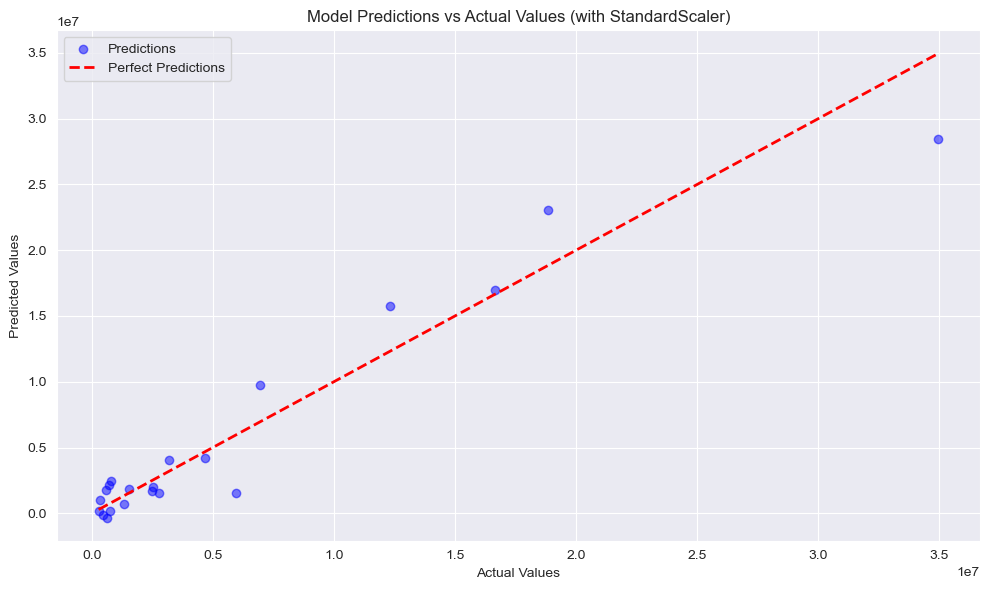

R2 Score with scaled features: 0.9248


In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Create visualization with cleaned and scaled data
plt.figure(figsize=(10, 6))

plt.scatter(y_clean, predictions_scaled, alpha=0.5, color='blue', label='Predictions')
reference_line = np.linspace(y_clean.min(), y_clean.max(), 100)
plt.plot(reference_line, reference_line, 'r--', lw=2, label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values (with StandardScaler)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"R2 Score with scaled features: {r2_score(y_clean, predictions_scaled):.4f}")

In [78]:
import joblib

# Save the StandardScaler
joblib.dump(scaler, 'standard_scaler.joblib')

# Save the trained model
joblib.dump(ridge, 'ridge_model_scaled_0.9248.joblib')

# Save feature configuration for reference
feature_config_scaled = {
    'scaler': 'StandardScaler',
    'features': list(X_enhanced.columns),
    'r2_score': 0.9248
}
joblib.dump(feature_config_scaled, 'feature_config_scaled.joblib')

['feature_config_scaled.joblib']

In [21]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load data
X = pd.read_parquet('mobile_banking_features.parquet')
y = pd.read_parquet('mobile_banking_target.parquet')['target']

# Create normalized features
X_with_time = X.copy()

# Print available columns to verify names
print("Available columns:")
print(X_with_time.columns.tolist())

# Let's create the features using verified column names
key_features = [
    'Account (% age 15+)',
    'Mobile money account (% age 15+)',
    'Used a mobile phone or the internet to access an account (% age 15+)',
    'Adult populaiton'
]

Available columns:
['Adult populaiton', 'Total Account Holders', 'Financial Institution Account Holders', 'Digital Users from Lower Income', 'Digital Balance Check Users', 'Avg Price of 1GB (USD)', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Bank capital to assets ratio (%)', 'Commercial bank branches (per 100,000 adults)', 'Individuals using the Internet (% of population)', 'Mobile cellular subscriptions (per 100 people)', 'Personal remittances, received (% of GDP)']
